# Load Data

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline

def disp_Data(x, y_true, y_pred, file_path, clt_num, cost, rows=1, columns=1, size=(6, 4)):
    fig, ax = plt.subplots(rows, columns, figsize=size)
    ax.plot(x, y_true, 'rx', label='average score')
    ax.plot(x, y_pred, 'b-', label='curve fitting')
    ax.set_xlim([0, max(x)+1])
    ax.set_ylim([0, max(y_true)+0.2])
    ax.legend(fontsize=14)
    ax.set_title("cluster {0}: cost {1}".format(clt_num, round(cost, 2)))
    fig.savefig(file_path, dpi=100)
    plt.show()
    
train_idx = dcp.open_Pickle("../../data/pickles/clusters_origin/15attempts/indices/index13.pickle")
train_idx = train_idx[9] #2, 8

train_scores = dcp.open_Pickle('../../data/pickles/seperate_origin/eventValue.pickle')
train_scores = train_scores[:300, :]/1e+4
attempts15 = np.arange(15)+1
attempts300 = np.arange(300)+1

## filtering discontinuous under 15 attempts
idx_all = []
idx_pure = []

for i in range(train_scores.shape[1]):
    if not np.isnan(train_scores[:15, i]).any():
        idx_all.append(i)
        idx_pure.append(i)
    else:
        idx_all.append(np.nan)

train_scores = train_scores[:, idx_pure]
print("Training data set: {0}".format(np.shape(train_scores)))

## get cluster data and cluster average data (average is centroid)
nClt = 13
for i in range(nClt):
    name = "cluster{0}".format(i+1)
    globals()[name] = train_scores[:, train_idx==i] # get cluster data
    
    ## get cluster average data
    data = np.ones(300)
    for j in range(len(data)):
        avg = eval(name)[j, :]
        avg = np.sum(avg[~np.isnan(avg)])/len(avg[~np.isnan(avg)])
        data[j] = avg

    globals()["avg{0}".format(i+1)] = data
    
dcp.make_folders("../../Figs/curve_fitting/")

Training data set: (300, 22832)
../../Figs/curve_fitting/ already present - Skipping pickling.


# 1. Single Curve
## 1-1. Two parameters

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw2/single/")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    pl2_opt, pl2_cost = cv.curve_Fitting(
        cv.powerlaw_least2, cv.powerlaw_curve2, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "../../Figs/curve_fitting/powerlaw2/single/sample{0}".format(i+1), clt_num = i+1)
    
    true_opt, true_cost = cv.curve_Fitting(
        cv.powerlaw_least2, cv.powerlaw_curve2, 
        attempts300, eval("avg{0}".format(i+1)), seed,
        "../../Figs/curve_fitting/powerlaw2/single/dummy", clt_num = i+1)
    
    y_fit_valid = cv.powerlaw_curve2(attempts300, pl2_opt[0], pl2_opt[1])
    y_fit_true = cv.powerlaw_curve2(attempts300, true_opt[0], true_opt[1])
    
    pl2_cost_valid = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_valid) # get cost for all data
    pl2_cost_ture = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_true) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_valid, 
              file_path="../../Figs/curve_fitting/powerlaw2/single/valid{0}".format(i+1), 
              clt_num=i+1, cost = pl2_cost_valid)

    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_true, 
              file_path="../../Figs/curve_fitting/powerlaw2/single/true{0}".format(i+1), 
              clt_num=i+1, cost = pl2_cost_ture)

## 1-2. Three parameters

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw3/single/")

seed = [1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    pl3_opt, pl3_cost = cv.curve_Fitting(
        cv.powerlaw_least3, cv.powerlaw_curve3, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "../../Figs/curve_fitting/powerlaw3/single/sample{0}".format(i+1), clt_num = i+1)
    
    true_opt, true_cost = cv.curve_Fitting(
        cv.powerlaw_least3, cv.powerlaw_curve3, 
        attempts300, eval("avg{0}".format(i+1)), seed,
        "../../Figs/curve_fitting/powerlaw3/single/dummy", clt_num = i+1)
    
    y_fit_valid = cv.powerlaw_curve3(attempts300, pl3_opt[0], pl3_opt[1], pl3_opt[2])
    y_fit_true = cv.powerlaw_curve3(attempts300, true_opt[0], true_opt[1], true_opt[2])
    
    pl3_cost_valid = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_valid) # get cost for all data
    pl3_cost_true = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_valid) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_valid, 
              file_path="../../Figs/curve_fitting/powerlaw3/single/valid{0}".format(i+1), 
              clt_num=i+1, cost = pl3_cost300)
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_true, 
              file_path="../../Figs/curve_fitting/powerlaw3/single/true{0}".format(i+1), 
              clt_num=i+1, cost = pl3_cost300)

## 1-3. Four parameters

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw4/single/")

seed = [1, 1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    pl4_opt, pl4_cost = cv.curve_Fitting(
        cv.powerlaw_least4, cv.powerlaw_curve4, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "../../Figs/curve_fitting/powerlaw4/single/sample{0}".format(i+1), clt_num = i+1)

    true_opt, true_cost = cv.curve_Fitting(
        cv.powerlaw_least4, cv.powerlaw_curve4, 
        attempts300, eval("avg{0}".format(i+1)), seed,
        "../../Figs/curve_fitting/powerlaw4/single/dummy", clt_num = i+1)


    y_fit_valid = cv.powerlaw_curve4(attempts300, pl4_opt[0], pl4_opt[1], pl4_opt[2], pl4_opt[3])
    y_fit_true = cv.powerlaw_curve4(attempts300, true_opt[0], true_opt[1], true_opt[2], true_opt[3])
    
    pl4_cost_valid = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_valid) # get cost for all data
    pl4_cost_true = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_true) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_valid, 
              file_path="../../Figs/curve_fitting/powerlaw4/single/valid{0}".format(i+1), 
              clt_num=i+1, cost = pl4_cost_valid)
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_true, 
              file_path="../../Figs/curve_fitting/powerlaw4/single/true{0}".format(i+1), 
              clt_num=i+1, cost = pl4_cost_true)

# 2. Multiple Curves

In [2]:
for p in range(3): # for pieces
    costs = []
    lengths = np.zeros([1, p+2, 13])
    indice = np.zeros([1, p+2, 13])

    for i in range(3): # for parameters
        print("\n\n - {0} pieces, {1} Parameter".format(p+2, i+2))
        if i == 0: # 2 parameters
            seed = [1, 1]
            leastFunction = cv.powerlaw_least2
        elif i == 1: # 3 parameters
            seed = [1, 1, 1]
            leastFunction = cv.powerlaw_least3
        elif i == 2: # 4 parmaeters
            seed = [1, 1, 1, 1]
            leastFunction = cv.powerlaw_least4

        for j in range(12): # for clusters
            print("\t avg{0}: ".format(j+1), end="")
            file_name = "avg{0}".format(j+1)
            cost, min_length, min_indice = cv.multCurve_Fitting(eval(file_name), leastFunction, s=seed, w=50, p=p+2)
            costs.append(cost)
            lengths[:, :, j] = min_length
            indice[:, :, j] = min_indice
            dcp.make_folders('../../data/pickles/Fitting/15Attempts/Power/pieces{0}/param{1}/avg{2}/'.format(p+2, i+2, j+1))
            dcp.make_Pickle(cost, '../../data/pickles/Fitting/15Attempts/Power/pieces{0}/param{1}/avg{2}/cost'.format(p+2, i+2, j+1))
            dcp.make_Pickle(min_length, '../../data/pickles/Fitting/15Attempts/Power/pieces{0}/param{1}/avg{2}/length'.format(p+2, i+2, j+1))
            dcp.make_Pickle(min_indice, '../../data/pickles/Fitting/15Attempts/Power/pieces{0}/param{1}/avg{2}/index'.format(p+2, i+2, j+1))



 - 2 pieces, 2 Parameter
	 avg1: 	 avg2: 	 avg3: 	 avg4: 	 avg5: 	 avg6: 	 avg7: 	 avg8: 	 avg9: 	 avg10: 	 avg11: 	 avg12: 

 - 2 pieces, 3 Parameter
	 avg1: 	 avg2: 	 avg3: 	 avg4: 	 avg5: 	 avg6: 	 avg7: 	 avg8: 	 avg9: 	 avg10: 	 avg11: 	 avg12: 

 - 2 pieces, 4 Parameter
	 avg1: 	 avg2: 	 avg3: 	 avg4: 	 avg5: 	 avg6: 	 avg7: 	 avg8: 	 avg9: 	 avg10: 	 avg11: 	 avg12: 

 - 3 pieces, 2 Parameter
	 avg1: 	 avg2: 	 avg3: 	 avg4: 	 avg5: 	 avg6: 	 avg7: 	 avg8: 	 avg9: 	 avg10: 	 avg11: 	 avg12: 

 - 3 pieces, 3 Parameter
	 avg1: 	 avg2: 	 avg3: 	 avg4: 	 avg5: 	 avg6: 	 avg7: 	 avg8: 	 avg9: 	 avg10: 	 avg11: 	 avg12: 

 - 3 pieces, 4 Parameter
	 avg1: 	 avg2: 	 avg3: 	 avg4: 	 avg5: 	 avg6: 	 avg7: 	 avg8: 	 avg9: 	 avg10: 	 avg11: 	 avg12: 

 - 4 pieces, 2 Parameter
	 avg1: 	 avg2: 	 avg3: 	 avg4: 	 avg5: 	 avg6: 	 avg7: 	 avg8: 	 avg9: 	 avg10: 	 avg11: 	 avg12: 

 - 4 pieces, 3 Parameter
	 avg1: 	 avg2: 	 avg3: 	 avg4: 	 avg5: 	 avg6: 	 avg7: 	 avg8: 	 avg9: 	 avg10: 	 avg11: 	

piece:0, param:0, len:2
LAST!!!!! piece:0, param:0, len:2
../../Figs/curve_fitting/MultiCurves/Power/pieces2/param2/ already present - Skipping pickling.
piece:0, param:0, len:2
../../Figs/curve_fitting/MultiCurves/Power/pieces2/param2/ already present - Skipping pickling.
LAST!!!!! piece:0, param:0, len:2
../../Figs/curve_fitting/MultiCurves/Power/pieces2/param2/ already present - Skipping pickling.
piece:0, param:0, len:2
../../Figs/curve_fitting/MultiCurves/Power/pieces2/param2/ already present - Skipping pickling.
LAST!!!!! piece:0, param:0, len:2
../../Figs/curve_fitting/MultiCurves/Power/pieces2/param2/ already present - Skipping pickling.
piece:0, param:0, len:2
../../Figs/curve_fitting/MultiCurves/Power/pieces2/param2/ already present - Skipping pickling.
LAST!!!!! piece:0, param:0, len:2
../../Figs/curve_fitting/MultiCurves/Power/pieces2/param2/ already present - Skipping pickling.
piece:0, param:0, len:2
../../Figs/curve_fitting/MultiCurves/Power/pieces2/param2/ already prese

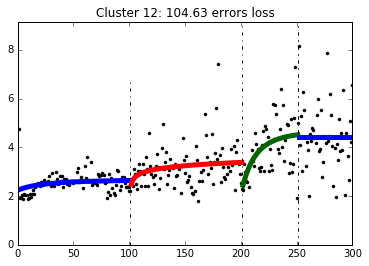

In [7]:
def disp_MultipleCurve():
    x = np.linspace(1, 300, 300)
    curve_color = ['blue', 'red', 'darkgreen', 'blue', 'red', 'darkgreen', 'blue', 'red', 'darkgreen', 'blue']
    for piece in range(3): # for pieces
        for param in range(3): # for parameters
            if param == 0: # 2 parameters
                seed = [1, 1]
                func_name = cv.powerlaw_curve2
                least_name = cv.powerlaw_least2
            elif param == 1: # 3 parameters
                seed = [1, 1, 1]
                func_name = cv.powerlaw_curve3
                least_name = cv.powerlaw_least3
            elif param == 2: # 4 parmaeters
                seed = [1, 1, 1, 1]
                func_name = cv.powerlaw_curve4
                least_name = cv.powerlaw_least4
                
            for clt in range(12): # for clusters

                x_range = "x{0}".format(clt+1)
                y_val = "y{0}".format(clt+1)
                lsq = "lsq{0}".format(clt+1)
                pred = "pred{0}".format(clt+1)
                
                x_idx = dcp.open_Pickle('../../data/pickles/Fitting/15Attempts/Power/pieces{0}/param{1}/avg{2}/index'.format(param+2, piece+2, clt+1))
                plt.clf()
                
                count = 0 # count for colour
                cost = []
                plt.plot(attempts300, eval('avg{0}'.format(clt+1)), '.', c='black')
                for i in range(len(x_idx)):
                    #print(x_idx[i])

                    if i == 0: # if the first
                        locals()[x_range] = x[:int(x_idx[1])]
                        locals()[y_val] = eval('avg{0}'.format(clt+1))[:int(x_idx[1])]
                        locals()[lsq] = least_squares(least_name, seed, args=(eval(x_range), eval(y_val)))
                        print("piece:{0}, param:{1}, len:{2}".format(piece, param, len(eval(lsq).x)))
                        if param == 0: # 2 parameters
                            locals()[pred] = func_name(eval(x_range), eval(lsq).x[0], eval(lsq).x[1])
                            plt.plot(eval(x_range), eval(pred), '-', c = curve_color[count], linewidth=5)
                            plt.plot([x_idx[1]]*50, np.linspace(0, max(eval(y_val))+2, 50), '-.', c='black', linewidth=1)
                            count = count+1
                            cost.append(eval(lsq).cost)
                        elif param == 1: # 3 parameters
                            locals()[pred] = func_name(eval(x_range), eval(lsq).x[0], eval(lsq).x[1], eval(lsq).x[2])
                            plt.plot(eval(x_range), eval(pred), '-', c = curve_color[count], linewidth=5)
                            plt.plot([x_idx[1]]*50, np.linspace(0, max(eval(y_val))+2, 50), '-.', c='black', linewidth=1)
                            count = count+1
                            cost.append(eval(lsq).cost)
                        elif param == 2: # 4 parmaeters
                            locals()[pred] = func_name(eval(x_range), eval(lsq).x[0], eval(lsq).x[1], eval(lsq).x[2], eval(lsq).x[3])
                            plt.plot(eval(x_range), eval(pred), '-', c = curve_color[count], linewidth=5)
                            plt.plot([x_idx[1]]*50, np.linspace(0, max(eval(y_val))+2, 50), '-.', c='black', linewidth=1)
                            count = count+1
                            cost.append(eval(lsq).cost)
                        #print(eval(x_range))

                    elif 0 < i < len(x_idx)-1:
                        locals()[x_range] = x[int(x_idx[i]):int(x_idx[i+1])]
                        locals()[y_val] = eval('avg{0}'.format(clt+1))[int(x_idx[i]):int(x_idx[i+1])]
                        locals()[lsq] = least_squares(least_name, seed, args=(eval(x_range), eval(y_val)))
                        print("piece:{0}, param:{1}, len:{2}".format(piece, param, len(eval(lsq).x)))
                        if param == 0: # 2 parameters
                            locals()[pred] = func_name(eval(x_range), eval(lsq).x[0], eval(lsq).x[1])
                            plt.plot(eval(x_range), eval(pred), '-', c = curve_color[count], linewidth=5)
                            plt.plot([x_idx[i+1]]*50, np.linspace(0, max(eval(y_val))+2, 50), '-.', c='black', linewidth=1)
                            count = count+1
                            cost.append(eval(lsq).cost)
                        elif param == 1: # 3 parameters
                            locals()[pred] = func_name(eval(x_range), eval(lsq).x[0], eval(lsq).x[1], eval(lsq).x[2])
                            plt.plot(eval(x_range), eval(pred), '-', c = curve_color[count], linewidth=5)
                            plt.plot([x_idx[i+1]]*50, np.linspace(0, max(eval(y_val))+2, 50), '-.', c='black', linewidth=1)
                            count = count+1
                            cost.append(eval(lsq).cost)
                        elif param == 2: # 4 parmaeters
                            locals()[pred] = func_name(eval(x_range), eval(lsq).x[0], eval(lsq).x[1], eval(lsq).x[2], eval(lsq).x[3])
                            plt.plot(eval(x_range), eval(pred), '-', c = curve_color[count], linewidth=5)
                            plt.plot([x_idx[i+1]]*50, np.linspace(0, max(eval(y_val))+2, 50), '-.', c='black', linewidth=1)
                            count = count+1
                            cost.append(eval(lsq).cost)

                    elif i == len(x_idx)-1: # if the last
                        locals()[x_range] = x[int(x_idx[i]):]
                        locals()[y_val] = eval('avg{0}'.format(clt+1))[int(x_idx[i]):]
                        locals()[lsq] = least_squares(least_name, seed, args=(eval(x_range), eval(y_val)))
                        print("LAST!!!!! piece:{0}, param:{1}, len:{2}".format(piece, param, len(eval(lsq).x)))
                        if param == 0: # 2 parameters
                            locals()[pred] = func_name(eval(x_range), eval(lsq).x[0], eval(lsq).x[1])
                            plt.plot(eval(x_range), eval(pred), '-', c = curve_color[count], linewidth=5)
                            plt.plot([x_idx[i]]*50, np.linspace(0, max(eval(y_val))+2, 50), '-.', c='black', linewidth=1)
                            count = count+1
                            cost.append(eval(lsq).cost)
                        elif param == 1: # 3 parameters
                            locals()[pred] = func_name(eval(x_range), eval(lsq).x[0], eval(lsq).x[1], eval(lsq).x[2])
                            plt.plot(eval(x_range), eval(pred), '-', c = curve_color[count], linewidth=5)
                            plt.plot([x_idx[i]]*50, np.linspace(0, max(eval(y_val))+2, 50), '-.', c='black', linewidth=1)
                            count = count+1
                            cost.append(eval(lsq).cost)
                        elif param == 2: # 4 parmaeters
                            locals()[pred] = func_name(eval(x_range), eval(lsq).x[0], eval(lsq).x[1], eval(lsq).x[2], eval(lsq).x[3])
                            plt.plot(eval(x_range), eval(pred), '-', c = curve_color[count], linewidth=5)
                            plt.plot([x_idx[i]]*50, np.linspace(0, max(eval(y_val))+2, 50), '-.', c='black', linewidth=1)
                            count = count+1
                            cost.append(eval(lsq).cost)
                            

                    plt.title("Cluster {0}: {1} errors loss".format(clt+1, round(np.sum(cost), 2)))
                    plt.ylim([0, max( eval(y_val) )+1])
                    dcp.make_folders("../../Figs/curve_fitting/MultiCurves/Power/pieces{0}/param{1}/".format(param+2, piece+2))
                    plt.savefig("../../Figs/curve_fitting/MultiCurves/Power/pieces{0}/param{1}/avg{2}".format(param+2, piece+2, clt+1))
    
disp_MultipleCurve()

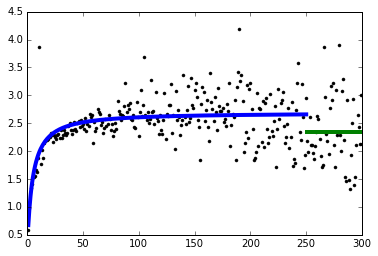

In [8]:
x_range = np.linspace(1, 300, 300)
x1 = x_range[:250]
x2 = x_range[250:]

y1 = avg6[:250]
y2 = avg6[250:]

lsq1 = least_squares(cv.powerlaw_least4, [1, 1, 1, 1], args=(x1, y1))
lsq2 = least_squares(cv.powerlaw_least4, [1, 1, 1, 1], args=(x2, y2))

plt.plot(attempts300, avg6, '.', c='black')
plt.plot(x1, cv.powerlaw_curve4(x1, lsq1.x[0], lsq1.x[1], lsq1.x[2], lsq1.x[3]), linewidth=4)
plt.plot(x2, cv.powerlaw_curve4(x2, lsq2.x[0], lsq2.x[1], lsq2.x[2], lsq2.x[3]), linewidth=4)

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw2/two/")

seed = [1, 1]

for i in range(nClt): 
    print("cluster {0}:".format(i+1))
    p1 = cv.multi_curveFitting_2(cv.powerlaw_least2, eval("avg{0}".format(i+1)), seed, min_range=10)

    x_range = np.linspace(1, 300, 300)
    x1 = x_range[:p1]
    x2 = x_range[p1:]

    true_y1 = eval("avg{0}".format(i+1))[:p1]
    true_y2 = eval("avg{0}".format(i+1))[p1:]

    lsq1 = least_squares(cv.powerlaw_least2, seed, args=(x1, true_y1))
    lsq2 = least_squares(cv.powerlaw_least2, seed, args=(x2, true_y2))

    pred_y1 = cv.powerlaw_curve2(x_range[:p1], lsq1.x[0], lsq1.x[1])
    pred_y2 = cv.powerlaw_curve2(x_range, lsq2.x[0], lsq2.x[1])

    print(" - break point: {0}".format(p1))
    ## save figures
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(attempts300, eval("avg{0}".format(i+1)), 'rx', label='average score')
    ax.plot(x_range[:p1], pred_y1, 'b-', label='curve 1', linewidth=3)
    ax.plot(x_range, pred_y2, 'g-', label='curve 2', linewidth=3)
    ax.plot(np.ones(100)*p1, np.linspace(0, 10, 100), '-.k', linewidth=1)
    ax.set_title("Cluster {0} (Cost {1}), Break point{2}"
                 .format(i, round(lsq1.cost+lsq2.cost, 2), p1) )
    #ax.set_ylim([0, max( eval("avg{0}".format(i+1)) )+0.2])
    ax.legend(fontsize=14)
    fig.savefig("../../Figs/curve_fitting/powerlaw2/two/cluster{0}".format(i+1), dpi=100)
    # plt.show()

#### 1) three curves

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw2/three/")

seed = [1, 1, 1]

for i in range(nClt): 
    print("cluster {0}:".format(i+1))
    p1, p2 = cv.multi_curveFitting_3(cv.powerlaw_least2, eval("avg{0}".format(i+1)), seed, min_range=10)

    x_range = np.linspace(1, 300, 300)
    x1 = x_range[:p1]
    x2 = x_range[p1:p2]
    x3 = x_range[p2:]

    true_y1 = eval("avg{0}".format(i+1))[:p1]
    true_y2 = eval("avg{0}".format(i+1))[p1:p2]
    true_y3 = eval("avg{0}".format(i+1))[p2:]

    lsq1 = least_squares(cv.powerlaw_least2, seed, args=(x1, true_y1))
    lsq2 = least_squares(cv.powerlaw_least2, seed, args=(x2, true_y2))
    lsq3 = least_squares(cv.powerlaw_least2, seed, args=(x3, true_y3))

    pred_y1 = cv.powerlaw_curve2(x_range[:p1], lsq1.x[0], lsq1.x[1])
    pred_y2 = cv.powerlaw_curve2(x_range[:p2], lsq2.x[0], lsq2.x[1])
    pred_y3 = cv.powerlaw_curve2(x_range, lsq3.x[0], lsq3.x[1])

    print(" - break point: {0} and {1}".format(p1, p2))
    ## save figures
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(attempts300, eval("avg{0}".format(i+1)), 'rx', label='average score')
    ax.plot(x_range[:p1], pred_y1, 'b-', label='curve 1', linewidth=3)
    ax.plot(x_range[:p2], pred_y2, 'g-', label='curve 2', linewidth=3)
    ax.plot(x_range, pred_y3, 'c-', label='curve 2', linewidth=3)
    
    # break points
    ax.plot(np.ones(100)*p1, np.linspace(0, 10, 100), '-.k', linewidth=1)
    ax.plot(np.ones(100)*p2, np.linspace(0, 10, 100), '-.k', linewidth=1)
    
    ax.set_title("Cluster {0} (Cost {1}), Break point:{2} and {3}"
                 .format(i, round(lsq1.cost+lsq2.cost+lsq3.cost, 2), p1, p2) )
    ax.set_ylim([0, max( eval("avg{0}".format(i+1)) )+0.2])
    ax.legend(fontsize=14)
    fig.savefig("../../Figs/curve_fitting/powerlaw2/three/cluster{0}".format(i+1), dpi=100)
    # plt.show()

## 2-2. Three parameters
#### 1) two curves

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw3/two/")

seed = [1, 1, 1]

for i in range(nClt): 
    print("cluster {0}:".format(i+1))
    p1 = cv.multi_curveFitting_2(cv.powerlaw_least3, eval("avg{0}".format(i+1)), seed, min_range=10)

    x_range = np.linspace(1, 300, 300)
    x1 = x_range[:p1]
    x2 = x_range[p1:]

    true_y1 = eval("avg{0}".format(i+1))[:p1]
    true_y2 = eval("avg{0}".format(i+1))[p1:]

    lsq1 = least_squares(cv.powerlaw_least3, seed, args=(x1, true_y1))
    lsq2 = least_squares(cv.powerlaw_least3, seed, args=(x2, true_y2))

    pred_y1 = cv.powerlaw_curve3(x_range[:p1], lsq1.x[0], lsq1.x[1], lsq1.x[2])
    pred_y2 = cv.powerlaw_curve3(x_range, lsq2.x[0], lsq2.x[1], lsq2.x[2])

    print(" - break point: {0}".format(p1))
    ## save figures
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(attempts300, eval("avg{0}".format(i+1)), 'rx', label='average score')
    ax.plot(x_range[:p1], pred_y1, 'b-', label='curve 1', linewidth=3)
    ax.plot(x_range, pred_y2, 'g-', label='curve 2', linewidth=3)
    ax.plot(np.ones(100)*p1, np.linspace(0, 10, 100), '-.k', linewidth=1)
    ax.set_title("Cluster {0} (Cost {1}), Break point{2}"
                 .format(i, round(lsq1.cost+lsq2.cost, 2), p1) )
    ax.set_ylim([0, max( eval("avg{0}".format(i+1)) )+0.2])
    ax.legend(fontsize=14)
    fig.savefig("../../Figs/curve_fitting/powerlaw3/two/cluster{0}".format(i+1), dpi=100)
    # plt.show()

#### 2) three curves

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw3/three/")

seed = [1, 1, 1]

for i in range(nClt): 
    print("cluster {0}:".format(i+1))
    p1, p2 = cv.multi_curveFitting_3(cv.powerlaw_least3, eval("avg{0}".format(i+1)), seed, min_range=10)

    x_range = np.linspace(1, 300, 300)
    x1 = x_range[:p1]
    x2 = x_range[p1:p2]
    x3 = x_range[p2:]

    true_y1 = eval("avg{0}".format(i+1))[:p1]
    true_y2 = eval("avg{0}".format(i+1))[p1:p2]
    true_y3 = eval("avg{0}".format(i+1))[p2:]

    lsq1 = least_squares(cv.powerlaw_least3, seed, args=(x1, true_y1))
    lsq2 = least_squares(cv.powerlaw_least3, seed, args=(x2, true_y2))
    lsq3 = least_squares(cv.powerlaw_least3, seed, args=(x3, true_y3))

    pred_y1 = cv.powerlaw_curve3(x_range[:p1], lsq1.x[0], lsq1.x[1], lsq1.x[2])
    pred_y2 = cv.powerlaw_curve3(x_range[:p2], lsq2.x[0], lsq2.x[1], lsq2.x[2])
    pred_y3 = cv.powerlaw_curve3(x_range, lsq3.x[0], lsq3.x[1], lsq3.x[2])

    print(" - break point: {0} and {1}".format(p1, p2))
    ## save figures
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(attempts300, eval("avg{0}".format(i+1)), 'rx', label='average score')
    ax.plot(x_range[:p1], pred_y1, 'b-', label='curve 1', linewidth=3)
    ax.plot(x_range[:p2], pred_y2, 'g-', label='curve 2', linewidth=3)
    ax.plot(x_range, pred_y3, 'c-', label='curve 2', linewidth=3)
    
    # break points
    ax.plot(np.ones(100)*p1, np.linspace(0, 10, 100), '-.k', linewidth=1)
    ax.plot(np.ones(100)*p2, np.linspace(0, 10, 100), '-.k', linewidth=1)
    
    ax.set_title("Cluster {0} (Cost {1}), Break point:{2} and {3}"
                 .format(i, round(lsq1.cost+lsq2.cost+lsq3.cost, 2), p1, p2) )
    ax.set_ylim([0, max( eval("avg{0}".format(i+1)) )+0.2])
    ax.legend(fontsize=14)
    fig.savefig("../../Figs/curve_fitting/powerlaw3/three/cluster{0}".format(i+1), dpi=100)
    # plt.show()

## 2-2. Four parameters
#### 1) two curves

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw4/two/")

seed = [1, 1, 1, 1]

for i in range(nClt): 
    print("cluster {0}:".format(i+1))
    p1 = cv.multi_curveFitting_2(cv.powerlaw_least4, eval("avg{0}".format(i+1)), seed, min_range=10)

    x_range = np.linspace(1, 300, 300)
    x1 = x_range[:p1]
    x2 = x_range[p1:]

    true_y1 = eval("avg{0}".format(i+1))[:p1]
    true_y2 = eval("avg{0}".format(i+1))[p1:]

    lsq1 = least_squares(cv.powerlaw_least4, seed, args=(x1, true_y1))
    lsq2 = least_squares(cv.powerlaw_least4, seed, args=(x2, true_y2))

    pred_y1 = cv.powerlaw_curve4(x_range[:p1], lsq1.x[0], lsq1.x[1], lsq1.x[2], lsq1.x[3])
    pred_y2 = cv.powerlaw_curve4(x_range, lsq2.x[0], lsq2.x[1], lsq2.x[2], lsq2.x[3])

    print(" - break point: {0}".format(p1))
    ## save figures
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(attempts300, eval("avg{0}".format(i+1)), 'rx', label='average score')
    ax.plot(x_range[:p1], pred_y1, 'b-', label='curve 1', linewidth=3)
    ax.plot(x_range, pred_y2, 'g-', label='curve 2', linewidth=3)
    ax.plot(np.ones(100)*p1, np.linspace(0, 10, 100), '-.k', linewidth=1)
    ax.set_title("Cluster {0} (Cost {1}), Break point: {2}"
                 .format(i, round(lsq1.cost+lsq2.cost, 2), p1) )
    ax.set_ylim([0, max( eval("avg{0}".format(i+1)) )+0.2])
    ax.legend(fontsize=14)
    fig.savefig("../../Figs/curve_fitting/powerlaw4/two/cluster{0}".format(i+1), dpi=100)
    # plt.show()

#### 2) three curves

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw4/three/")

seed = [1, 1, 1, 1]

for i in range(nClt): 
    print("cluster {0}:".format(i+1))
    p1, p2 = cv.multi_curveFitting_3(cv.powerlaw_least4, eval("avg{0}".format(i+1)), seed, min_range=20)

    x_range = np.linspace(1, 300, 300)
    x1 = x_range[:p1]
    x2 = x_range[p1:p2]
    x3 = x_range[p2:]

    true_y1 = eval("avg{0}".format(i+1))[:p1]
    true_y2 = eval("avg{0}".format(i+1))[p1:p2]
    true_y3 = eval("avg{0}".format(i+1))[p2:]

    lsq1 = least_squares(cv.powerlaw_least4, seed, args=(x1, true_y1))
    lsq2 = least_squares(cv.powerlaw_least4, seed, args=(x2, true_y2))
    lsq3 = least_squares(cv.powerlaw_least4, seed, args=(x3, true_y3))

    pred_y1 = cv.powerlaw_curve4(x_range[:p1], lsq1.x[0], lsq1.x[1], lsq1.x[2], lsq1.x[3])
    pred_y2 = cv.powerlaw_curve4(x_range[:p2], lsq2.x[0], lsq2.x[1], lsq2.x[2], lsq2.x[3])
    pred_y3 = cv.powerlaw_curve4(x_range, lsq3.x[0], lsq3.x[1], lsq3.x[2], lsq3.x[3])

    print(" - break point: {0} and {1}".format(p1, p2))
    ## save figures
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(attempts300, eval("avg{0}".format(i+1)), 'rx', label='average score')
    ax.plot(x_range[:p1], pred_y1, 'b-', label='curve 1', linewidth=3)
    ax.plot(x_range[:p2], pred_y2, 'g-', label='curve 2', linewidth=3)
    ax.plot(x_range, pred_y3, 'c-', label='curve 2', linewidth=3)
    
    # break points
    ax.plot(np.ones(100)*p1, np.linspace(0, 10, 100), '-.k', linewidth=1)
    ax.plot(np.ones(100)*p2, np.linspace(0, 10, 100), '-.k', linewidth=1)
    
    ax.set_title("Cluster {0} (Cost {1}), Break point: {2} and {3}"
                 .format(i, round(lsq1.cost+lsq2.cost, 2), p1, p2) )
    ax.set_ylim([0, max( eval("avg{0}".format(i+1)) )+0.2])
    ax.legend(fontsize=14)
    fig.savefig("../../Figs/curve_fitting/powerlaw4/three/cluster{0}".format(i+1), dpi=100)
    # plt.show()

In [ ]:
x_range = np.linspace(1, 300, 300)
seed = [1, 1, 1, 1]

cv.multi_test(x_range, avg3, cv.powerlaw_least4, seed, scope=10, layer=3)